In [1]:
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
seed = 256
rng = np.random.RandomState(seed)

In [3]:
rng

In [4]:
# creating paths
root_dir = os.path.abspath("E:\\kaggle\\identifying the digit")
data_dir = os.path.join(root_dir,'Images')

In [5]:
os.path.exists(root_dir),os.path.exists(data_dir)

(True, True)

In [6]:
train = pd.read_csv(os.path.join(root_dir, 'train.csv'))
test = pd.read_csv(os.path.join(root_dir, 'Test_fCbTej3.csv'))

sample_sub = pd.read_csv(os.path.join(root_dir, 'Sample_Submission_lxuyBuB.csv'))

In [7]:
train.shape, test.shape, sample_sub.shape

((49000, 2), (21000, 1), (0, 2))

In [8]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [9]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [10]:
# Reading a image
img_name = rng.choice(train.filename)
img_name[0:9]

'31904.png'

In [11]:
filepath = os.path.join(data_dir,'train',img_name)

In [12]:
img = imread(filepath, flatten = True)

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [13]:
img.shape

(28, 28)

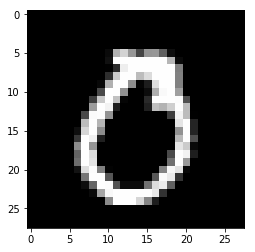

In [14]:
pylab.imshow(img, cmap='gray')

In [15]:
# Reading the images
temp = []
for img_name in train.filename:
    filepath = os.path.join(data_dir, 'train', img_name)
    img = imread(filepath, flatten = True)
    img = img.astype("float64")
    temp.append(img)
#temp    

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [16]:
len(temp), temp[0:6]

(49000,
 [array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           26., 143.,  96.,   0.,   0.,   0.

In [17]:
train_x = np.stack(temp)
train_x.shape

(49000, 28, 28)

In [18]:
train[0:6]

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3
5,5.png,9


In [19]:
temp = []
for img_name in test.filename:
    filepath = os.path.join(data_dir, 'test',img_name)
    img = imread(filepath, flatten=True)
    img = img.astype("float64")
    temp.append(img)

test_x = np.stack(temp)
test_x.shape

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


(21000, 28, 28)

In [20]:
# one hot encoding trget
train_y = pd.get_dummies(train.label)

In [21]:
train_y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scale = StandardScaler()
scale.fit(train_x)

scale.trainsform(train_x)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [24]:
train_x[0].max()

255.0

In [25]:
len(train_x)

49000

In [26]:
def scaling(a):
    for i in range(0,len(a)):
        a[i] /= a[i].max()
    return a    

In [27]:
train_x = scaling(train_x)
test_x = scaling(test_x)

In [28]:
from sklearn.model_selection import train_test_split
x = train_x
y = train_y

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2)

In [29]:
x_train.shape, y_val.shape

((39200, 28, 28), (9800, 10))

In [30]:
from keras import backend as K

K.set_image_data_format('channels_last')
numpy.random.seed(0)

Using TensorFlow backend.


In [31]:
x_train.shape[0]

39200

In [32]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float64')
x_val = x_val.reshape(x_val.shape[0],28,28,1).astype('float64')

In [33]:
# Buildin CNN Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout

In [34]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3), strides=1, padding = 'same',
                 input_shape = (28,28,1), activation = "relu"))
model.add(Dropout(0.2))


model.add(Conv2D(filters=32, kernel_size = (3,3), strides=1, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 48, kernel_size=(3,3), strides=1, padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation='softmax'))



In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 48)        13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 48)          0         
__________

In [36]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [37]:
model.fit(x_train, y_train,
         batch_size=64,
         epochs=10,
         validation_data = (x_val,y_val))

Train on 39200 samples, validate on 9800 samples
Epoch 1/10
39200/39200 [==============================] - 1385s 35ms/step - loss: 0.2140 - acc: 0.9336 - val_loss: 0.0680 - val_acc: 0.9800
Epoch 2/10
39200/39200 [==============================] - 1239s 32ms/step - loss: 0.0645 - acc: 0.9795 - val_loss: 0.0511 - val_acc: 0.9852
Epoch 3/10
39200/39200 [==============================] - 1237s 32ms/step - loss: 0.0442 - acc: 0.9858 - val_loss: 0.0388 - val_acc: 0.9882
Epoch 4/10
39200/39200 [==============================] - 1238s 32ms/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0390 - val_acc: 0.9874
Epoch 5/10
 7936/39200 [=====>........................] - ETA: 16:01 - loss: 0.0281 - acc: 0.9912

KeyboardInterrupt: 

In [40]:
test_x = test_x.reshape(test_x.shape[0],28,28,1).astype('float64')

preds = model.predict(test_x)

In [41]:
preds.shape

(21000, 10)

In [42]:
test_pred_classes = np.argmax(preds, axis=1)

In [44]:
test_pred_classes.shape

(21000,)

In [45]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [47]:
data = {'filename' : test.filename, 'label': test_pred_classes}

In [54]:
sub1 = pd.DataFrame(data)

In [49]:
sub1.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [50]:
sub1.shape

(21000, 2)

In [55]:
sub1.to_csv(os.path.join(root_dir,'sub1.csv'), index=False)